In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [22]:
gdb17 = pd.read_pickle('data/gdb17/gdb17_2.pkl')

In [23]:
gdb17.head()

,smile,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,BrC1=C2C3C4C3N(CC4C#C)C2=NC(=O)S1,11.408086,-0.131822,11.408086,0.131822,0.678953,295.161,288.105,293.946246,80.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,BrC1=C2C3=C4C(NC2=O)=CC(=O)C4=CN3C=N1,11.943333,-0.242523,11.943333,0.080581,0.496712,290.076,286.044,288.948688,82.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,BrC1=C2C3C4NCCOC34CC2=CC(=O)S1,11.461319,-0.024190,11.461319,0.024190,0.783572,300.177,290.097,298.961562,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,BrC1=C2C3CC3CC#CC=CC2=CSC1=O,11.655443,0.123116,11.655443,0.123116,0.670074,293.185,284.113,291.955748,80.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BrC1=C2C3CC4CC4C3CNC2=NC(=O)S1,11.364913,-0.111360,11.364913,0.111360,0.799797,299.193,288.105,297.977546,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
len(gdb17)

5000000

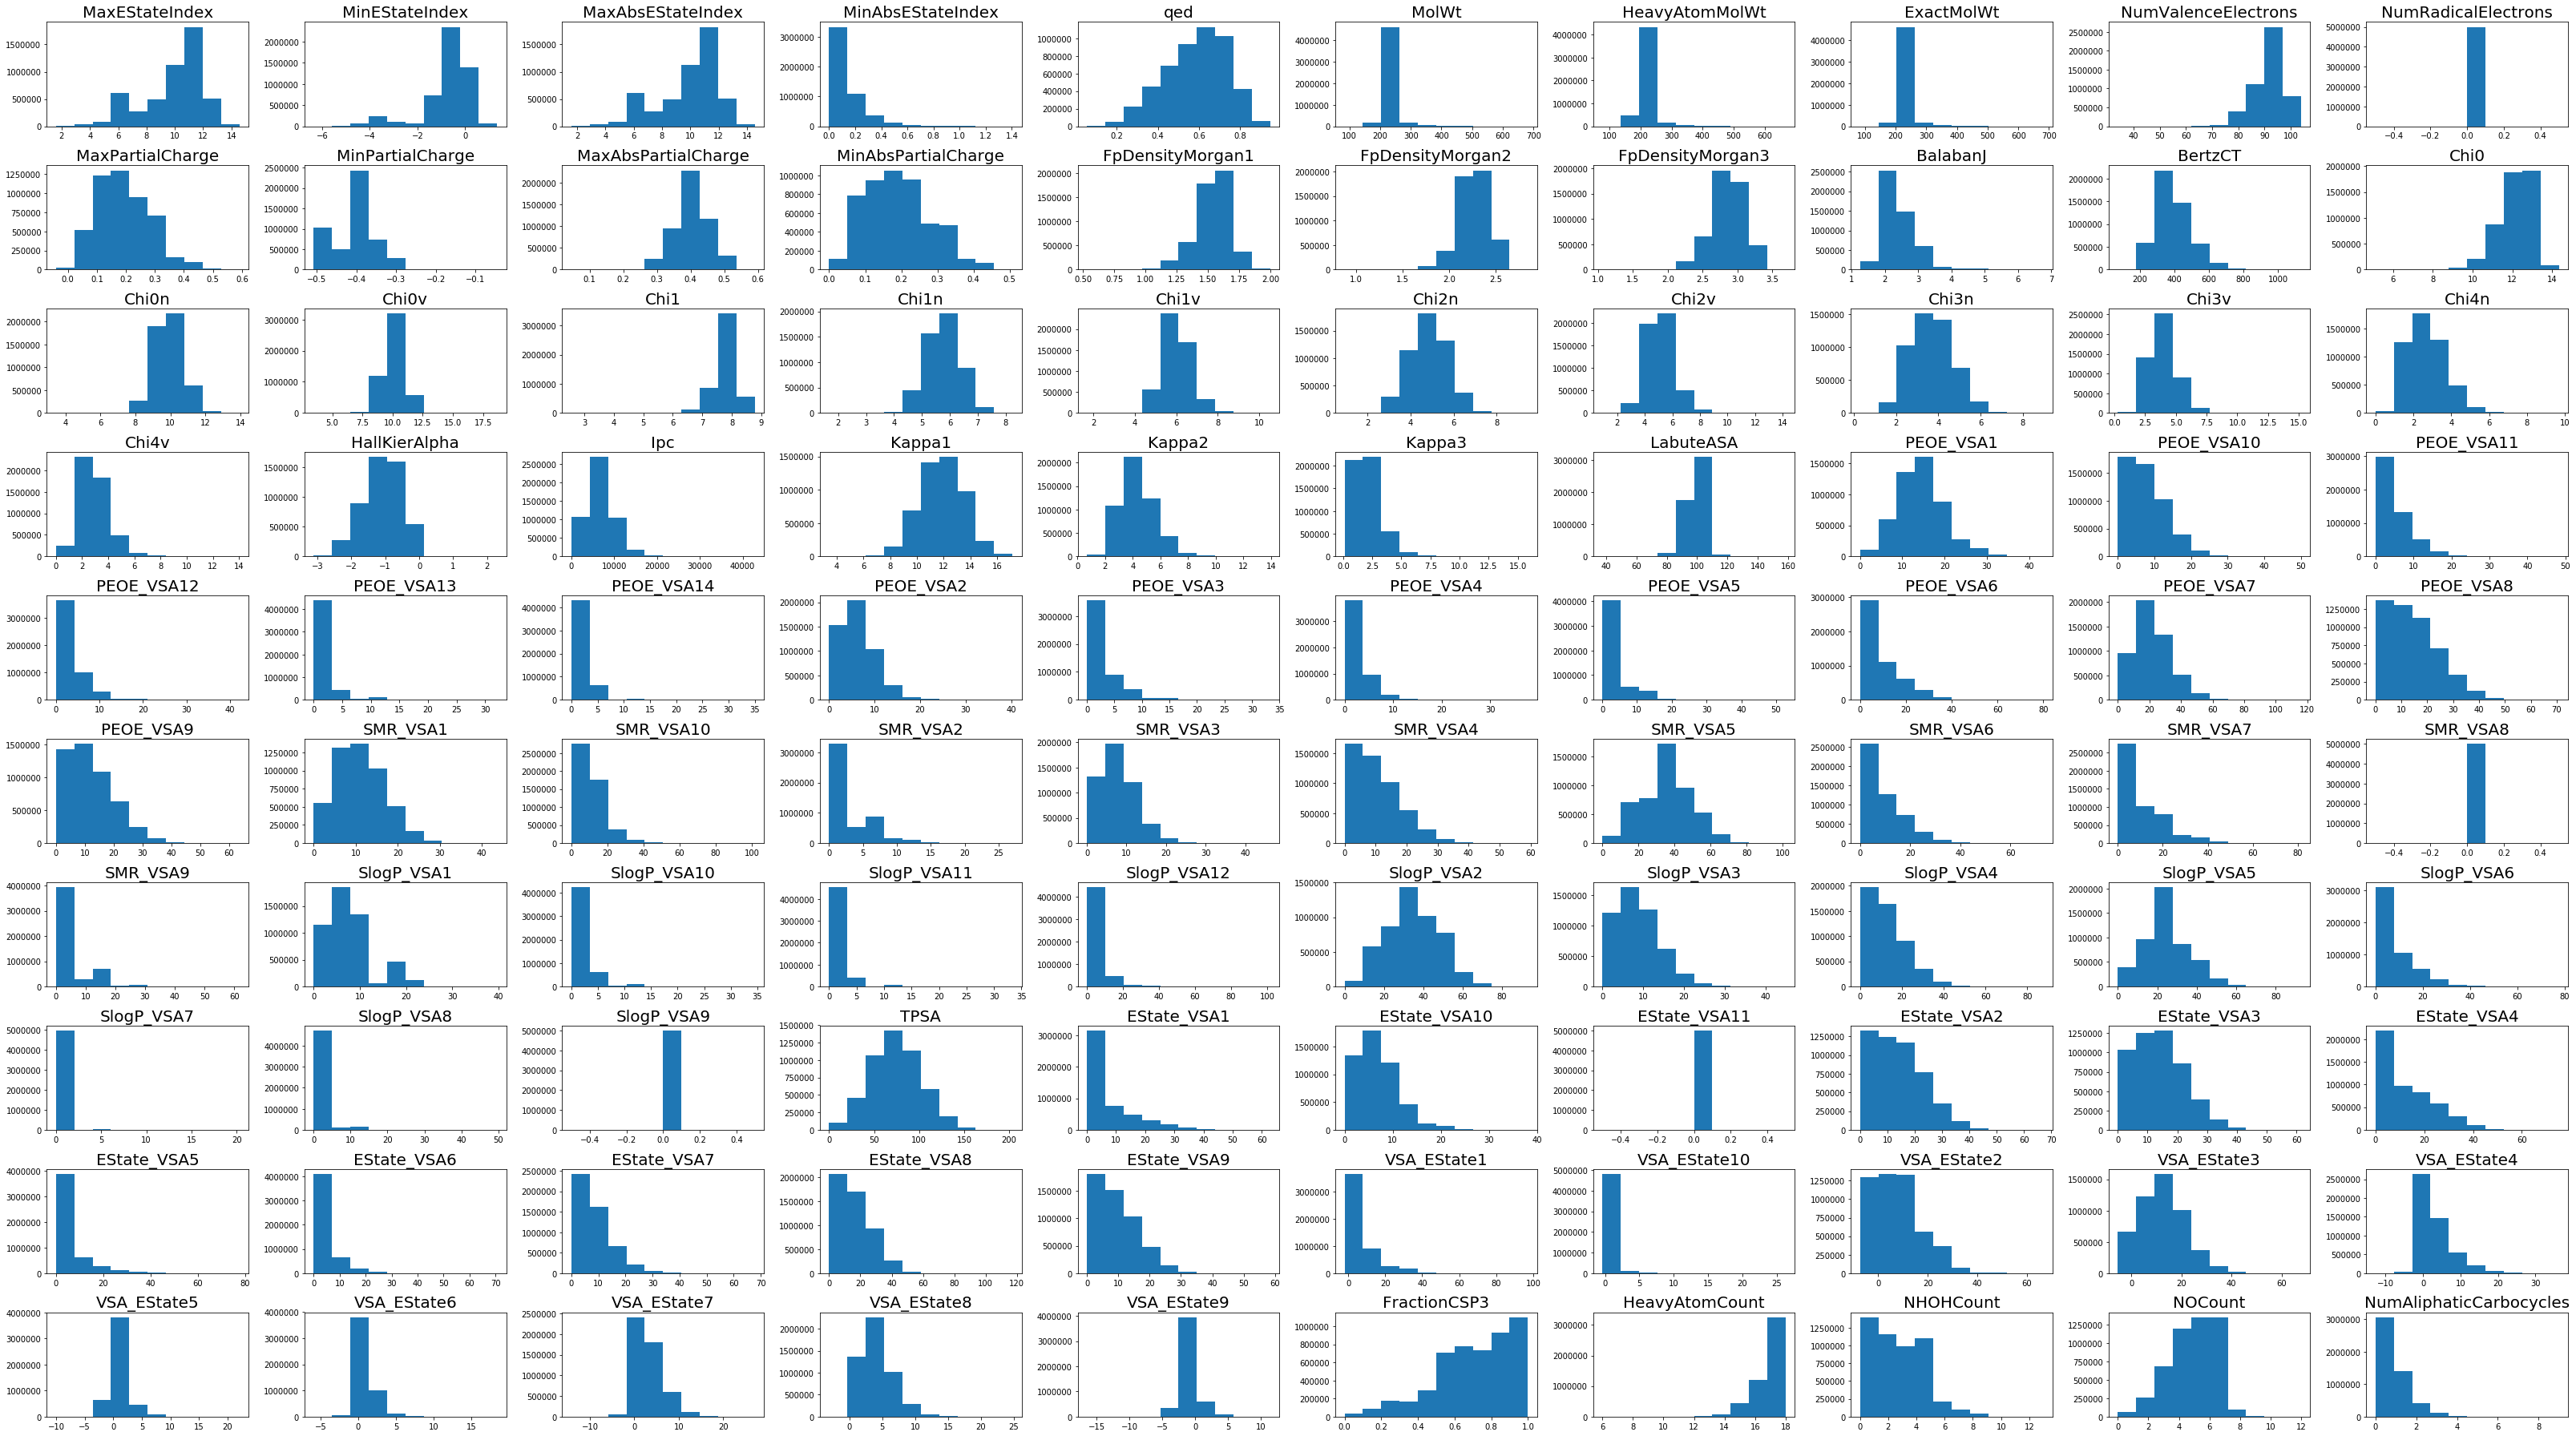

In [25]:
fig, ax = plt.subplots(10,10, figsize=(45,25))

for i, ax in enumerate(fig.axes):
    ax.hist(gdb17[gdb17.columns[i+1]])
    ax.set_title(gdb17.columns[i+1], fontsize=20)
fig.tight_layout()
plt.show()

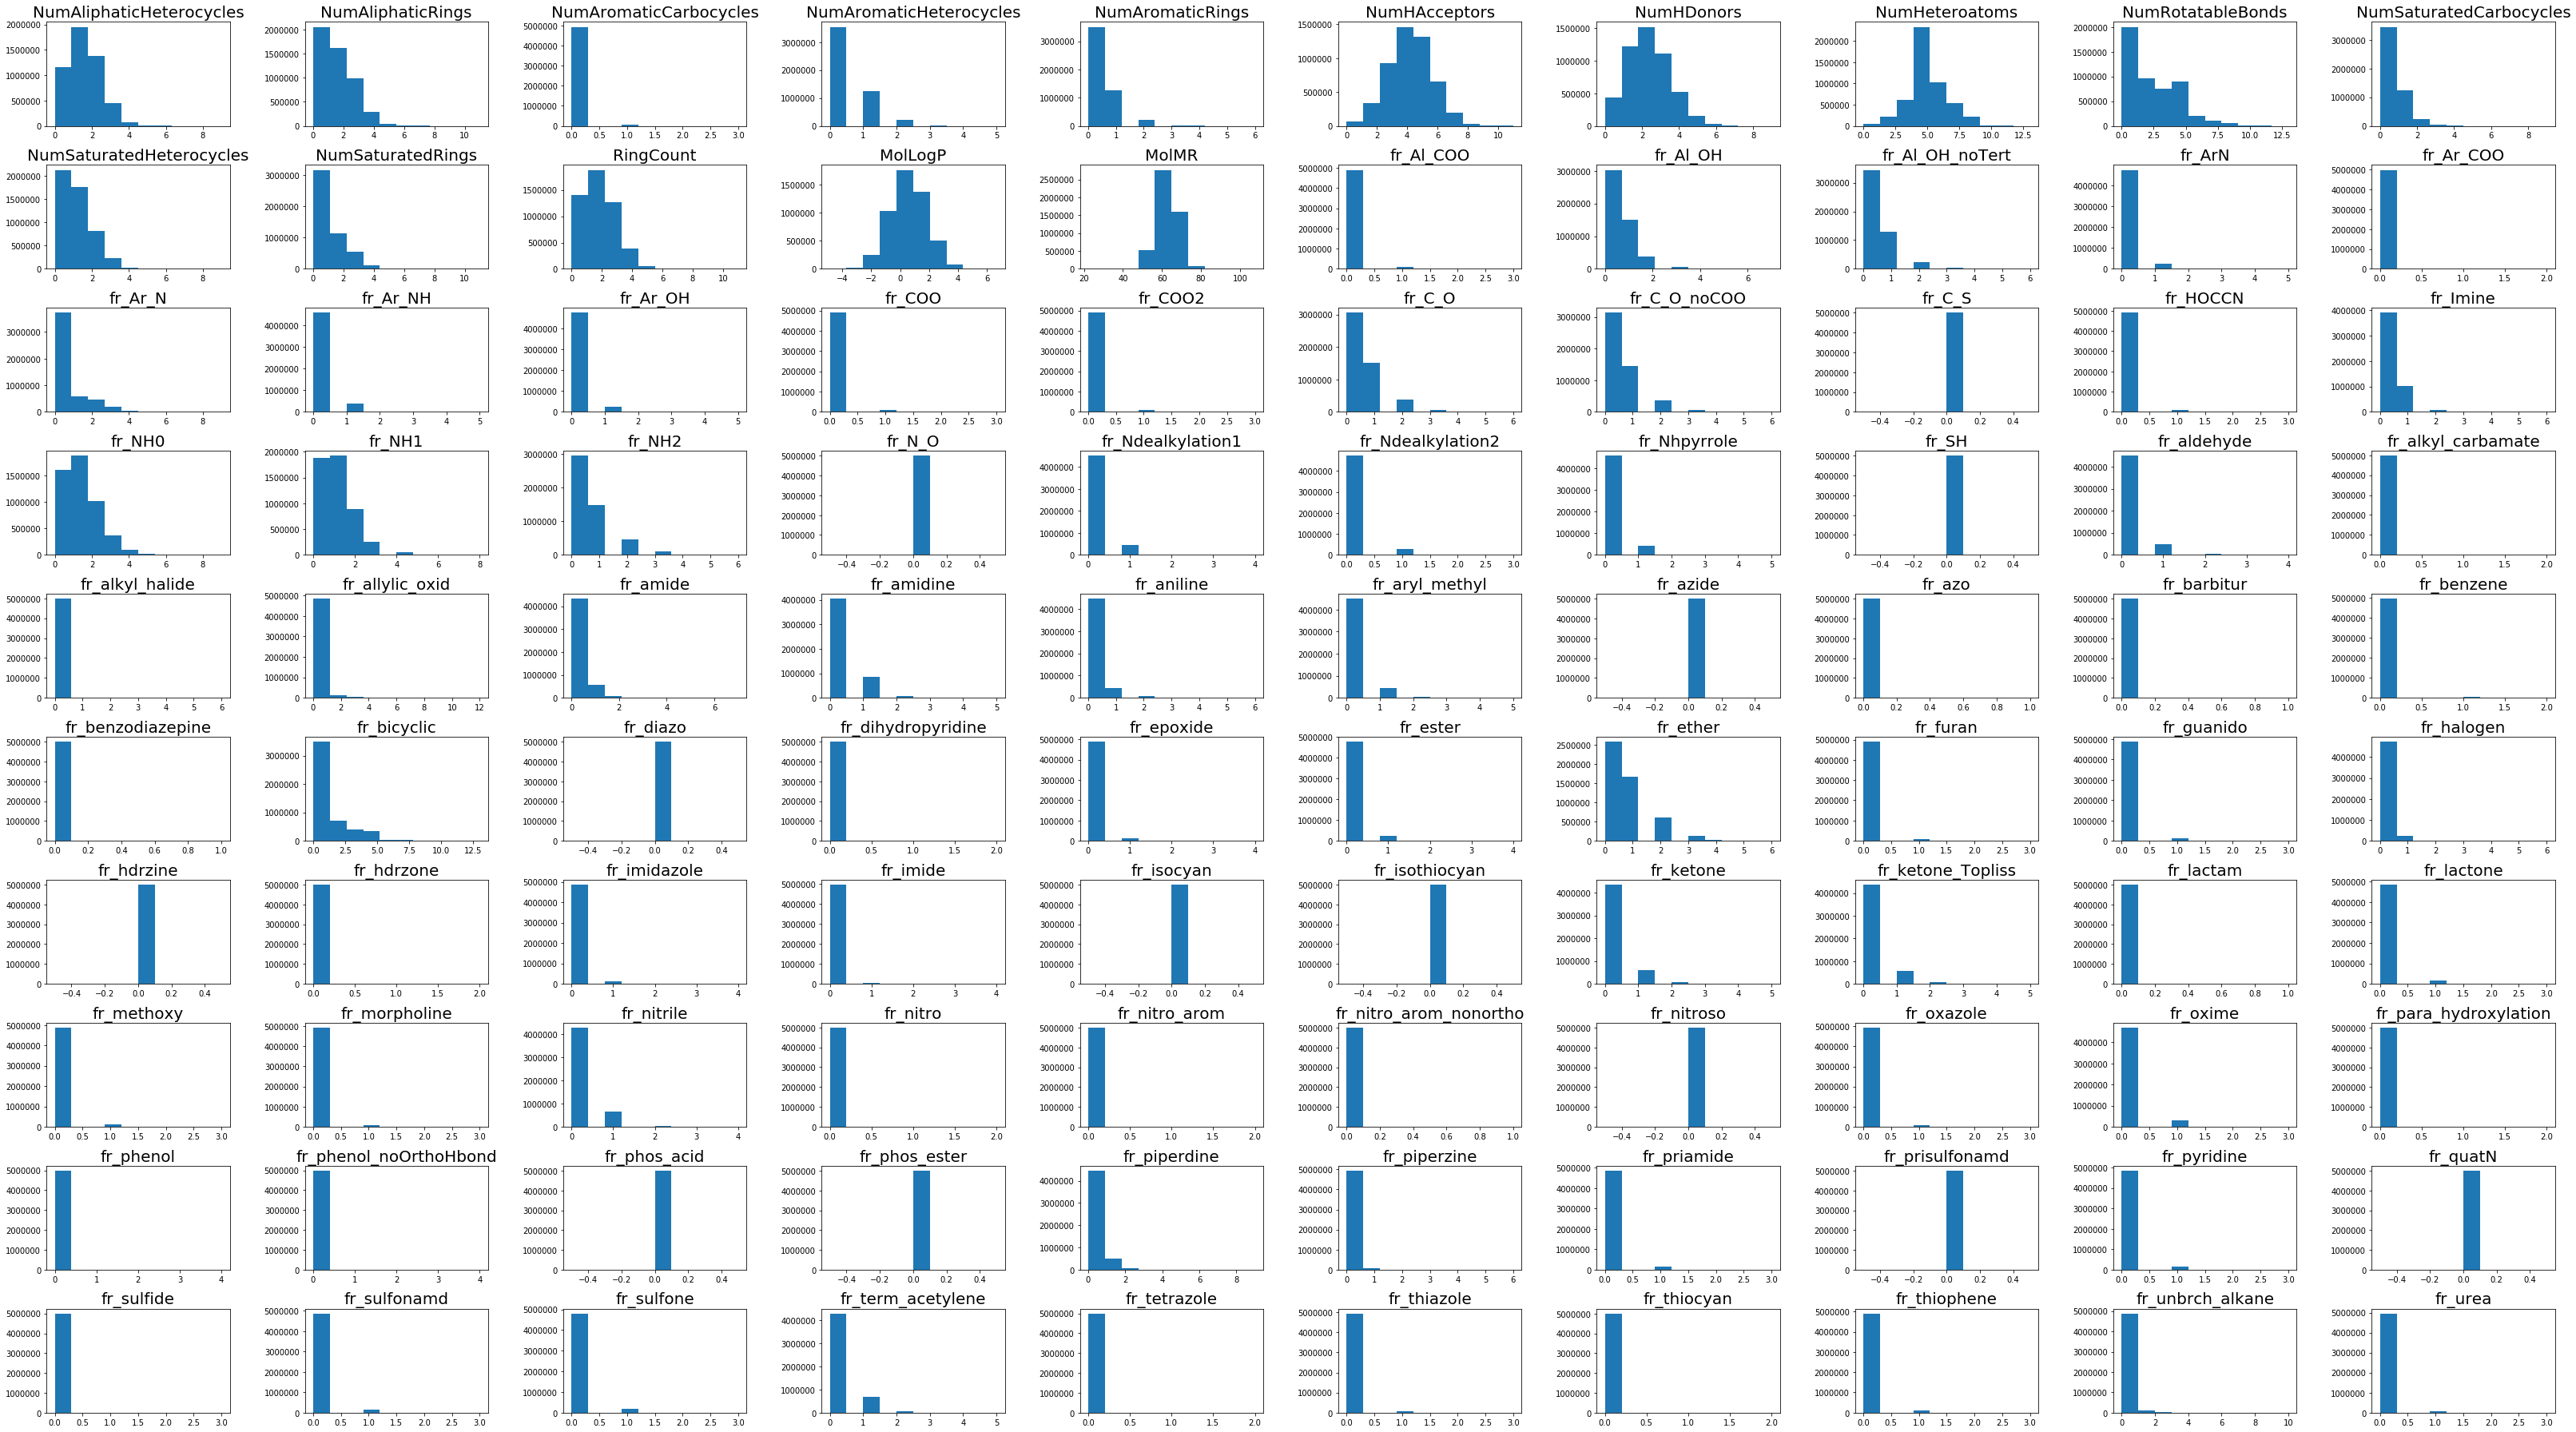

In [26]:
fig, ax = plt.subplots(10,10, figsize=(45,25))

for i, ax in enumerate(fig.axes):
    ax.hist(gdb17[gdb17.columns[i+101]])
    ax.set_title(gdb17.columns[i+101], fontsize=20)
fig.tight_layout()
plt.show()

In [ ]:
gdb17_scaled = gdb17.copy()

In [66]:
variances = []
for col in gdb17_scaled.columns:
    if col != 'smile':
        data = np.array(gdb17_scaled[col]).reshape(-1,1)
        scaler = MinMaxScaler()
        scaler.fit(data)
        gdb17_scaled[col] = scaler.transform(data)
        variances.append(np.std(gdb17_scaled[col])**2)

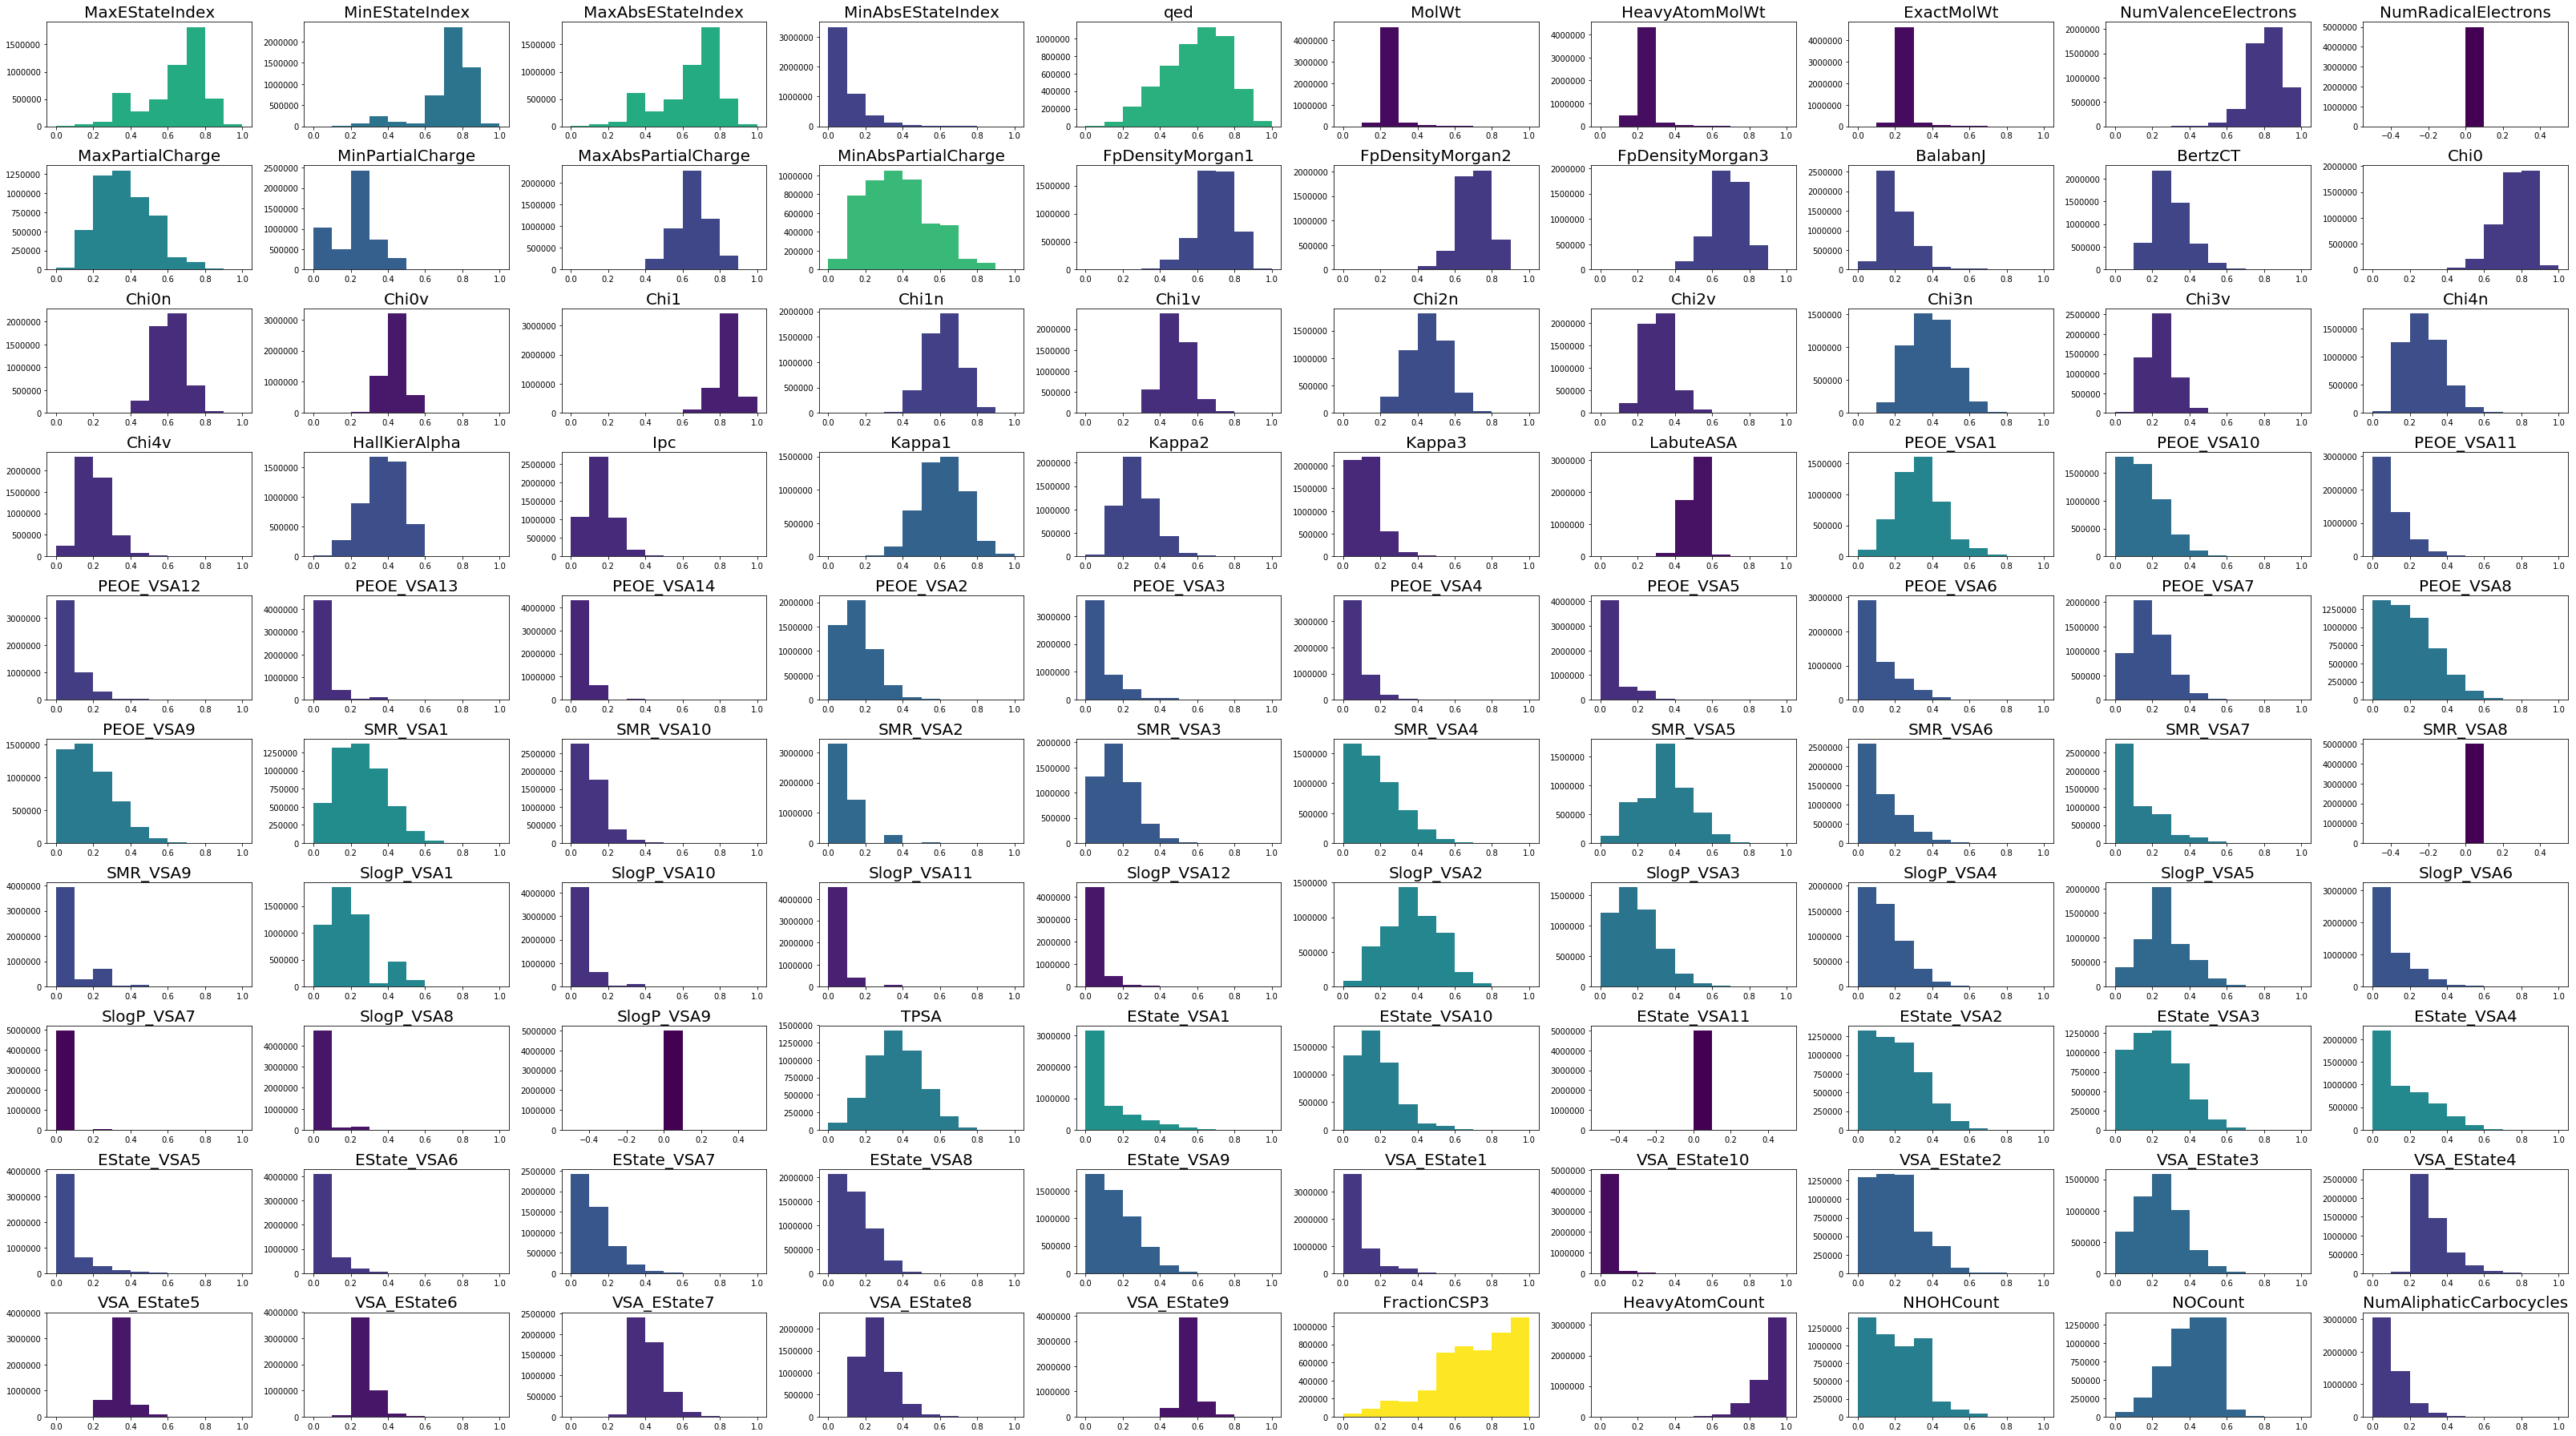

In [58]:
fig, ax = plt.subplots(10,10, figsize=(45,25))
cmap = cm.get_cmap('viridis')
max_var = max(variances)

for i, ax in enumerate(fig.axes):
    ax.hist(gdb17_scaled[gdb17_scaled.columns[i+1]], color=cmap(variances[i] / max_var))
    ax.set_title(gdb17_scaled.columns[i+1], fontsize=20)
fig.tight_layout()
plt.show()

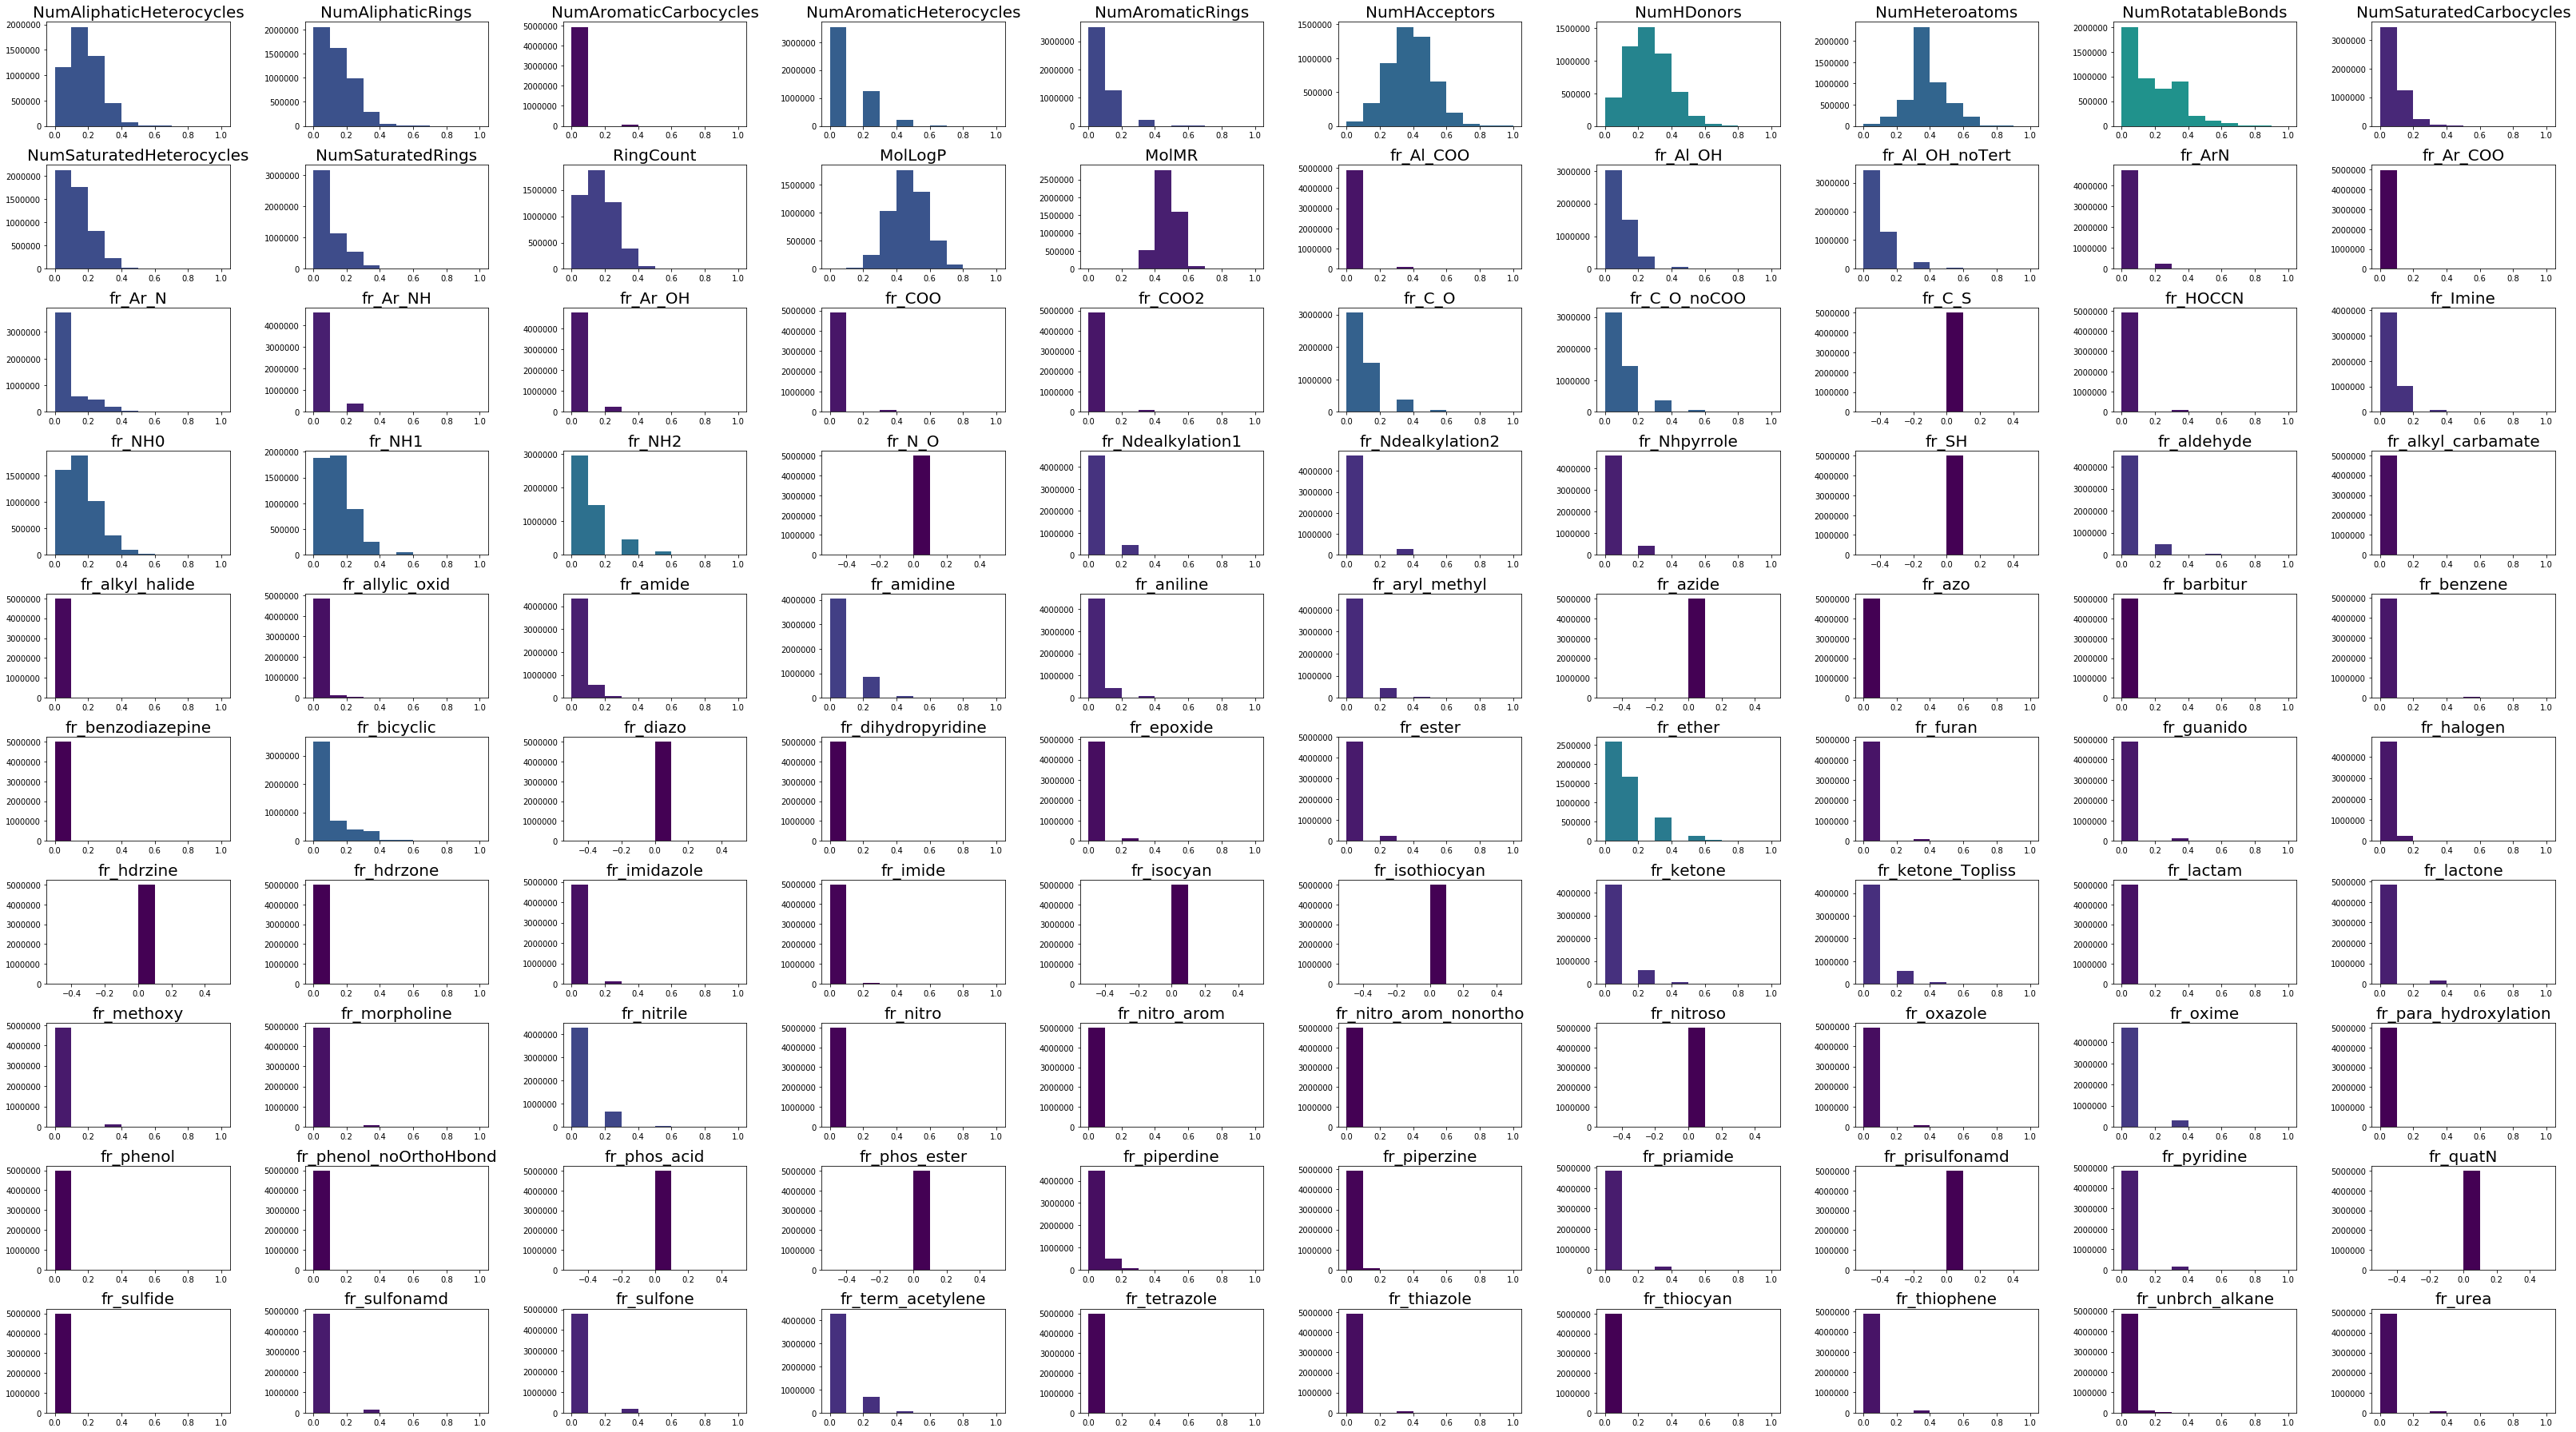

In [59]:
fig, ax = plt.subplots(10,10, figsize=(45,25))

for i, ax in enumerate(fig.axes):
    ax.hist(gdb17_scaled[gdb17_scaled.columns[i+101]], color=cmap(variances[i+100] / max_var))
    ax.set_title(gdb17_scaled.columns[i+101], fontsize=20)
fig.tight_layout()
plt.show()

In [70]:
pop_idxs = []
pop_vars = variances.copy()
pop_cols = gdb17_scaled.columns[1:].to_list()
for i, var in enumerate(variances):
    if var <= 1e-3:
        pop_idxs.append(i)
for idx in reversed(pop_idxs):
    pop_vars.pop(idx)
    pop_cols.pop(idx)
len(pop_cols)

163

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162


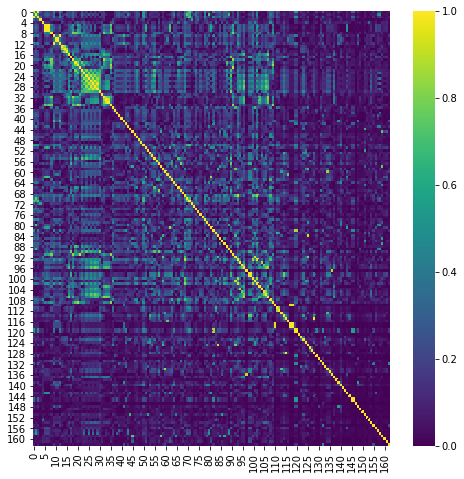

In [89]:
corrs = np.zeros((len(pop_cols), len(pop_cols)))
for i in range(len(pop_cols)):
    print(i)
    data1 = gdb17_scaled[pop_cols[i]]
    for j in range(len(pop_cols)):
        data2 = gdb17_scaled[pop_cols[j]]
        coeff = abs(np.corrcoef(data1, data2)[0][1])
        corrs[i,j] = coeff
plt.figure(figsize=(8,8))
sns.heatmap(corrs, cmap='viridis')
plt.show()

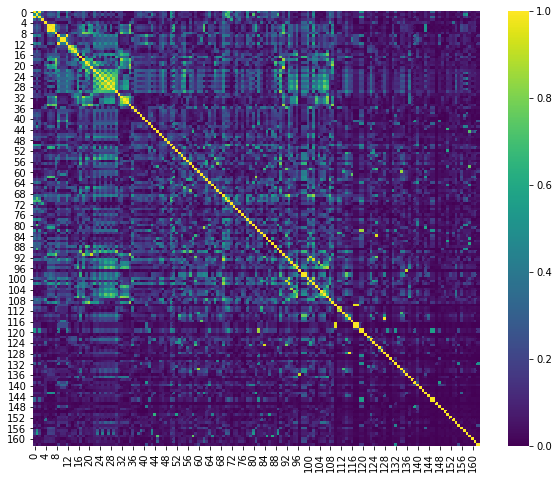

In [91]:
plt.figure(figsize=(10,8))
sns.heatmap(corrs, cmap='viridis')
plt.show()

In [93]:
for i in range(corrs.shape[0]):
    for j in range(corrs.shape[1]):
        if i != j:
            if corrs[i,j] > 0.9:
                print('{} {} - {}'.format(pop_cols[i], pop_cols[j], corrs[i,j]))

MaxEStateIndex MaxAbsEStateIndex - 0.9999999999999998
MaxAbsEStateIndex MaxEStateIndex - 0.9999999999999998
MolWt HeavyAtomMolWt - 0.9799041812066579
MolWt ExactMolWt - 0.9999787554546437
HeavyAtomMolWt MolWt - 0.9799041812066578
HeavyAtomMolWt ExactMolWt - 0.9796122284642167
ExactMolWt MolWt - 0.9999787554546435
ExactMolWt HeavyAtomMolWt - 0.9796122284642167
MaxPartialCharge MinAbsPartialCharge - 0.996863441331572
MinPartialCharge MaxAbsPartialCharge - 0.9908106154338532
MaxAbsPartialCharge MinPartialCharge - 0.9908106154338531
MinAbsPartialCharge MaxPartialCharge - 0.9968634413315719
Chi1 HeavyAtomCount - 0.9203305702557983
Chi2n Chi3n - 0.9056562564475488
Chi2v Chi3v - 0.9084102483324901
Chi3n Chi2n - 0.9056562564475487
Chi3n Chi4n - 0.9633329700421684
Chi3v Chi2v - 0.90841024833249
Chi3v Chi4v - 0.9616744894549013
Chi4n Chi3n - 0.9633329700421686
Chi4v Chi3v - 0.9616744894549013
Kappa2 Kappa3 - 0.9309947036627327
Kappa3 Kappa2 - 0.9309947036627328
VSA_EState4 fr_NH2 - 0.94389359663